In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Tarefa 3 - Neural Networks
Third assessed coursework for the course: Técnicas e Algoritmos em Ciência de Dados

This tarefa provides an exciting opportunity for students to put their knowledge acquired in class into practice, using neural networks to solve real-world problems in both classification and regression. Students will apply the concepts they have learned to build, train, and optimize neural networks, using a validation set to fine-tune hyperparameters. Students will also get used to generating important plots during training to analyse the models' behaviour. By the end of the project, students will have gained hands-on experience in implementing neural networks.

## General guidelines:

* This work must be entirely original. You are allowed to research documentation for specific libraries, but copying solutions from the internet or your classmates is strictly prohibited. Any such actions will result in a deduction of points for the coursework.
* Please enter your code in the designated areas of the notebook. You can create additional code cells to experiment with, but __make sure to place your final solutions where they are requested in the notebook.__
* Before submitting your work, make sure to rename the file to the random number that you created for the previous coursework (for example, 289479.ipynb).

## Notebook Overview:

1. [Regression](#Regression) (50%)
2. [Classification](#Classification) (50%)

# Regression
## Dataset and Problem Description
In this exercise, you will use the Energy Efficiency Prediction dataset. This dataset contains information about the energy efficiency of buildings based on eight features, including the size of the building, the orientation, and the type of building materials used. The dataset includes two targets: heating load and cooling load, which represent the energy required to heat and cool the building, respectively.
This dataset is useful for building neural networks that predict the energy efficiency of buildings, which is an important problem in the field of sustainable energy. The dataset has been used in several machine learning research papers and provides a challenging regression problem.

## Exercise Description: Energy Efficiency Prediction with Neural Networks
In this exercise, you will use the Energy Efficiency Prediction dataset provided.
You will build and train a neural network to predict the heating load (column labelled y1 in the dataset) and the cooling load (column labelled y2) of a building based on its energy efficiency features. 

**To complete this exercise, you will write code to build and train neural networks for this problem:**

1. Split the dataset into training, validation, and test sets, using a 70:15:15 ratio.

2. Using numpy, build a neural network that takes in the energy efficiency features as input and predicts the heating load as output. You will choose the number of neurons per layers and the number of layers, but each layer will have the same number of neurons.

3. Code the forward pass and backpropagation algorithm to learn the weights of the neural network. Use the training set to train the neural network and update the weights using stochastic gradient descent. You will need to regularize your neural network using weight decay, that is, you will include a regularization term in your error function.

4. Monitor the training by plotting the training and validation losses across the epochs. 

The performance of your neural network will be different depending on the number of layers, number of neurons per layer and the value of λ that controls the amount of weight decay. You will experiment with 3 values of λ: 0 (no weight decay), 0.001 and 0.0001.
To choose the best network configuration and assess its performance you will:

1. Calculate the loss for each configuration on the validation set.

2. Choose one of the following:

    - Create 3 networks for each value of the λ regularization parameter. The first network with one hidden layer and 100 neurons, the second with two hidden layers and 250 neurons per layer, and the third with three hidden layers and 150 neurons per layer. At the end you should have 9 values of the loss in the validation set. 
    - The number of layers has to be an input argument to the function you’re coding (you should use an appropriate data structure to store the hidden layers). Generate 3 [heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html), one for each value of the λ regularization parameter, displaying the loss on the validation set by plotting the number of layers and number of neurons in a grid. This will help you visualise the best configuration for the neural network. For each heatmap you can choose all possible nine combinations between 1 to 3 hidden layers and 100, 150 and 250 neurons per layer, but you can also choose different values. **This option gives you 7.5 bonus points.**
__Note that for point a. you can have a variable $W_x$ for each hidden layer $x$, but for point b., in order to obtain the bonus points, you will have to have a variable number of layers and the weights $W_x$ have to be stored in an appropriate data structure of variable length according to the input argument.__

**Important:**
* Train for 50 epochs, remember that one epoch finishes when the whole training set was seen during training.
* Set the learning rate $\eta$ to $0.01$.

## Splitting and Preparing the Dataset

In [9]:
energy = pd.read_csv("energy_efficiency.csv")
energy.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085


In [10]:
x, t = energy.values[:, :-2], energy.values[:, -2:]

x_train, x_temp, t_train, t_temp = train_test_split(x, t, train_size = 0.7)
x_valid, x_test, t_valid, t_test = train_test_split(x_temp, t_temp, train_size = 0.5)

## Defining Main Functions

In [11]:
# Most common activation functions
def id_activation(z):
    return z

def id_derivative(z):
    return 1

def sigmoid_activation(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    sig = sigmoid_activation(z)
    return  sig*(1-sig)

def softmax_activation(z: np.ndarray):
    return np.exp(z)/(np.sum(np.exp(z), axis=1)).reshape(-1,1)

def softmax_derivative(z):
    soft = softmax_activation(z)
    return soft * (1-soft)

# Error functions
def SSE(predict, target):
    return np.sum((predict - target)**2)

def SSE_derivative(predict, target):
    return predict - target

def RMSE(predict, target):
    return np.sqrt(np.mean((predict - target)**2))

def Cross_Entropy(predict, target):
    return -(np.sum(target * np.log(predict) + (1-target)*np.log(1-predict)))

def CE_derivative(predict, target):
    return (target/predict) + (1 - target)/(1 - predict)

def CE_multiclass(predict, target):
    return -np.sum(target * np.log(predict))

## Defining Main Class

In [12]:
# Multi-Layer Perceptron
class MultiLayer_Perceptron():
    def __init__(self, model: int, regularization: float = 0) -> None:
        """Initiating the class, you must decide wich type of model will be trained

        :param model: An enumeration of the type of model:
            - 0 = Regression Model
            - 1 = Binary Classification
            - 2 = Multiple Non-Exclusive Classification
            - 3 = Multiple Mutualy Exclusive Classification
        
        :type model: int
        
        :param regularization: The value of lambda to be used in the quadratic error regularization
        :type regularization: float, defaults to 0
        """
        self.features = ((sigmoid_activation, sigmoid_derivative, id_activation, SSE, SSE_derivative), 
                         (sigmoid_activation, sigmoid_derivative, sigmoid_activation, Cross_Entropy, CE_derivative), 
                         (sigmoid_activation, sigmoid_derivative, sigmoid_activation, Cross_Entropy, CE_derivative), 
                         (sigmoid_activation, sigmoid_derivative, softmax_activation, CE_multiclass, SSE_derivative))
        # Defining some important functions according to the wished model
        self.model = model

        self.activation_func = self.features[model][0]
        self.derivative_func = self.features[model][1]

        self.output_func = self.features[model][2]

        self.error_func = self.features[model][3]
        self.error_derivative = self.features[model][4]

        self.weights = None
        
        self.reg_lambda = regularization # Lambda value to use in the regularization

    def forward_pass(self, x: np.ndarray, apply_bias: bool = False) -> tuple[np.ndarray | float, list, list]:
        """
        Implements the forward pass of a multi-layer fully connected perceptron.
        
        Parameters
        ----------
        x : a 2-dimensional array
            the input data
        apply_bias : bool, defaults to False
            if True, apply bias to the input data. For independent use purposes
        
        Returns
        -------
        y_pred : np.ndarray
            the output of the computation of the forward pass of the network
        a_list : list
            list with every layer's input matrices
        z_list : list
            list with every layer's output matrices
        """
        if apply_bias:
            x = np.insert(x, 0, 1, axis=1)
        
        # If we have only one weight matrix, we have no layers, just a simple prediction
        if len(self.weights) == 1:
            return self.output_func(x @ self.weights[-1])

        # Using forward propagation
        a_list = []
        z_list = []

        # Input layer:
        a = x @ self.weights[0]
        a_list.append(a)

        z = self.activation_func(a)
        z = np.insert(z, 0, 1, axis = 1)
        z_list.append(z)

        # Hidden layers: 
        for i in range(1, len(self.weights)-1):
            a = z @ self.weights[i] # First step of unit
            a_list.append(a)

            z = self.activation_func(a) # Second step of unit
            z = np.insert(z, 0, 1, axis = 1) # Preparing z for next bias
            z_list.append(z)

        # Last Hidden Layer (output):
        y_pred = self.output_func(z @ self.weights[-1])
        return y_pred, a_list, z_list

    def __backpropagation__(self, x: np.ndarray, target: np.ndarray, prediction: np.ndarray, a_list: list[np.ndarray], z_list: list[np.ndarray]):
        """Adjust the weight matrices in the 'weights' list, accordding to the error propagated from the dataset 'x', the prediction, and the target.
        This auxiliar method will alter the weights in-place, and won't return anything.

        :param x: Dataset used to train the model.
        :type x: np.ndarray

        :param target: Target of the prediction.
        :type target: np.ndarray

        :param prediction: Predicted values.
        :type prediction: np.ndarray

        :param a_list: List with each unit's input values.
        :type a_list: list[np.ndarray]

        :param z_list: List with each unit's output values.
        :type z_list: list[np.ndarray]
        """
        a_list.reverse()
        z_list.reverse()
        self.weights.reverse() 
        # Now, we're dealing with the reversed weights and parameters, so we're starting from the output layer

        # Updating the output layer
        w = self.weights[0]
        z = z_list[0]

        deltas_next = self.error_derivative(prediction, target)

        d_error = z.T @ deltas_next
        reg_error = d_error + (self.reg_lambda * np.sum(w)) # Regularizing the error
        
        w = w - (0.01 * reg_error) # Adjusting weights
        self.weights[0] = w

        # Updating the middle layers
        for layer in range(1, len(self.weights) - 1):
            w = self.weights[layer]
            a = a_list[layer]
            z = z_list[layer]

            # Finding the layer's deltas
            deltas = self.derivative_func(a) * (self.weights[layer-1][1:,:] @ deltas_next.T).T
            
            d_error = z.T @ deltas
            reg_error = d_error + (self.reg_lambda * np.sum(w)) # Regularizing the error

            w = w - (0.01 * reg_error) # Adjusting weights

            deltas_next = deltas
            self.weights[layer] = w

        # Finally, updating the input weights
        w = self.weights[-1]

        deltas = self.derivative_func(x @ w) * (self.weights[-2][1:,:] @ deltas_next.T).T

        d_error = x.T @ deltas
        reg_error = d_error + (self.reg_lambda * np.sum(w)) # Regularizing the error

        w = w - (0.01 * reg_error) # Adjusting weights
        self.weights[-1] = w

        self.weights.reverse() # Reverts w back to normal
        return

    def __generate_random_weights__(self, x, target, neuron_num, layer_num):
        """This auxiliar function generates random weight matrices according to the passed parameters, and updates them in-place.

        :param x: 2-dimensional array with training data. Each line must be a datapoint. Defines the first dimension of the input weight matrix. 
        :type x: np.ndarray

        :param target: 2-dimensional array with targets to the training data. Each line must refer to a datapoint. Defines the second dimension of the output weight matrix.
        :type target: np.ndarray
        
        :param neuron_num: Number of neurons to use in each hidden layer. Will define the shapes of most weight matrices.
        :type neuron_num: int
        
        :param layer_num: Number of hidden layers to use in the neural network. Will define the amount of weight matrices.
        :type layer_num: int
        """
        w = []
        rng = np.random.default_rng()
        
        # Creating input weights
        w.append(rng.normal(0, 0.01, (x.shape[1], neuron_num)))

        # Creating middle layers weights
        for i in range(1, layer_num):
            w.append(rng.normal(0, 0.01, (neuron_num + 1, neuron_num)))

        # Creating output weights
        w.append(rng.normal(0, 0.01, (neuron_num + 1, target.shape[1])))

        self.weights = w
        return

    def fit(self, x: np.ndarray, target: np.ndarray, 
            layer_num: int, neuron_num: int, epochs_num: int, 
            validation: tuple[np.ndarray, np.ndarray] = None, gradient_descent: int = 0, apply_bias: bool = True):
        """Trains the model through multilayer perceptron neural network.

        :param x: 2-dimensional array with training data. Each line must be a datapoint. 
        :type x: np.ndarray

        :param target: 2-dimensional array with targets to the training data. Each line must refer to a datapoint.
        :type target: np.ndarray
        
        :param layer_num: Number of hidden layers to use in the neural network.
        :type layer_num: int
        
        :param neuron_num: Number of neurons to use in each hidden layer. All layers will have the same amount of neurons.
        :type neuron_num: int
        
        :param epochs_num: Amount of repetitions to train the weights through the stochastic gradient descent. 
            BE CAREFUL! If using stochastic gradient descent, it's not recommended to use too many epochs.
        :type epochs_num: int

        :param validation: Must be a tuple. The first element being the validation set. The second one being the target set.
        If passed, will calculate the validation loss along with the training, and return it in the loss list.
        :type validation: tuple[np.ndarray, np.ndarray | float], defaults to None

        :param gradient_descent: enumeration that defines wich method of gradient descent to use
            - 0 = Stochastic
            - 1 = Batch
        :type gradient_descent: int, defaults to 0

        :param apply_bias: if True, apply a 'ones' column at the beggining of the data array
        :type apply_bias: bool, defaults to True

        ---

        :return loss: Returns a list with three lists: one with range(epochs_num), one with the training loss, and (if passed) one with the validation loss
        :rtype loss: list[list, list, list]
        """
        # First we apply the bias in the raw data
        if apply_bias:
            x = np.insert(x, 0, 1, axis=1)

        self.__generate_random_weights__(x, target, neuron_num, layer_num)

        # Now, we must train the data through forward pass, gradient descent and backpropagation
        loss = [list(range(epochs_num)), [], []]

        if gradient_descent == 0:
            # Stochastic Gradient Descent
            for epoch in range(epochs_num):
                for i in range(x.shape[0]):
                    datapoint = x[i].reshape(1,-1) # Reshaping it to be a 2-dimensional line vector
                    target_point = target[i].reshape(1,-1)

                    y_pred, a_list, z_list = self.forward_pass(datapoint) # Calling the forward pass to a single datapoint

                    self.__backpropagation__(datapoint, target_point, y_pred, a_list, z_list) # Updating w with backpropagation
                    
                y_pred = self.forward_pass(x)[0]
                if self.model == 0:
                    loss[1].append(RMSE(y_pred, target)) # At the end of each epoch, we calculate the error
                else:    
                    loss[1].append(self.error_func(y_pred, target)) # At the end of each epoch, we calculate the error
                
                if validation:
                    val_pred = self.forward_pass(validation[0], True)[0]
                    if self.model == 0:
                        loss[2].append(RMSE(val_pred, validation[1]))
                    else:    
                        loss[2].append(self.error_func(val_pred, validation[1]))

            return loss
        
        elif gradient_descent == 1:
            # Batch Gradient Descent
            for epoch in range(epochs_num):
                y_pred, a_list, z_list = self.forward_pass(x)

                self.__backpropagation__(x, target, y_pred, a_list, z_list) # Updating w with backpropagation
                    
                loss[1].append(self.error_func(y_pred, target)) # At the end of each epoch, we calculate the error
                
                if validation:
                    val_pred = self.forward_pass(validation[0], True)[0]
                    loss[2].append(self.error_func(val_pred, validation[1]))

            return loss


## Testing the Neural Network

In [13]:
# Let's create a test instance
regression = MultiLayer_Perceptron(0, 0.01)
training_loss = regression.fit(x_train, t_train, 5, 3, 50, (x_valid, t_valid))

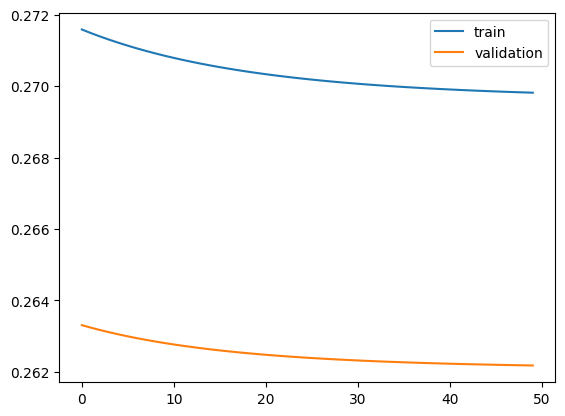

In [14]:
plt.plot(training_loss[0], training_loss[1], label="train")
plt.plot(training_loss[0], training_loss[2], label="validation")
plt.legend()
plt.show()
# The plots are in different scales since we use SSE, wich does not normalizes the error, and our training data is far bigger than the validation 

In [15]:
# Comparing parameters with the validation set

reg_la0 = MultiLayer_Perceptron(0, 0)
reg_la1 = MultiLayer_Perceptron(0, 0.001)
reg_la2 = MultiLayer_Perceptron(0, 0.0001)

# To change the heatmap, just change the values of the ranges:
layers_number = range(1, 6)
neurons_number = range(50, 251, 50)
# If changing the steps, remember to change the indexing scale inside the loop

data = np.zeros((len(layers_number), len(neurons_number), 3))

for layers in layers_number:
    for neurons in neurons_number:
        loss0 = reg_la0.fit(x_train, t_train, layers, neurons, 50)[1][-1]
        data[layers-1, int(neurons/50)-1, 0] = loss0 

        loss1 = reg_la1.fit(x_train, t_train, layers, neurons, 50)[1][-1]
        data[layers-1, int(neurons/50)-1, 1] = loss1 
        
        loss2 = reg_la2.fit(x_train, t_train, layers, neurons, 50)[1][-1]
        data[layers-1, int(neurons/50)-1, 2] = loss2
        
plot_df0 = pd.DataFrame(data[:, :, 0], layers_number, neurons_number)
plot_df1 = pd.DataFrame(data[:, :, 1], layers_number, neurons_number)
plot_df2 = pd.DataFrame(data[:, :, 2], layers_number, neurons_number)

# This cell takes a lot of time to run (around 40 minutes)

C:\Users\georg\AppData\Local\Temp\ipykernel_27140\95304115.py:131: RuntimeWarning: overflow encountered in matmul
  deltas = self.derivative_func(a) * (self.weights[layer-1][1:,:] @ deltas_next.T).T
C:\Users\georg\AppData\Local\Temp\ipykernel_27140\95304115.py:131: RuntimeWarning: invalid value encountered in multiply
  deltas = self.derivative_func(a) * (self.weights[layer-1][1:,:] @ deltas_next.T).T


[Text(978.81045751634, 0.5, 'Number of Layers'),
 Text(0.5, 14.722222222222216, 'Number of Neurons')]

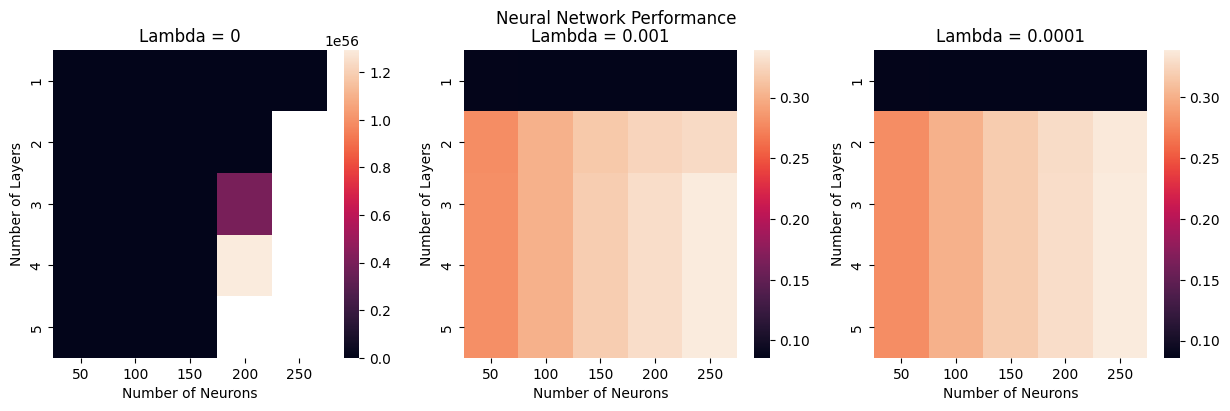

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle("Neural Network Performance")

sns.heatmap(plot_df0, ax=axes[0])
sns.heatmap(plot_df1, ax=axes[1])
sns.heatmap(plot_df2, ax=axes[2])

axes[0].set_title("Lambda = 0")
axes[0].set(ylabel="Number of Layers", xlabel="Number of Neurons", )

axes[1].set_title("Lambda = 0.001")
axes[1].set(ylabel="Number of Layers", xlabel="Number of Neurons")

axes[2].set_title("Lambda = 0.0001")
axes[2].set(ylabel="Number of Layers", xlabel="Number of Neurons")

In [18]:
plot_df0[250]

1    0.086247
2         NaN
3         NaN
4         NaN
5         NaN
Name: 250, dtype: float64

With $\lambda = 0$, we got a small area with empty space, and as we can see in the dataframe, it's because we got NaN values as results. I believe this happened due to approximation issues in numpy.

In our validation we observed that the best parameter is to use only 1 layer. Let's make an average between the first line of each dataframe to decide wich regularization value to use:

In [19]:
print(np.mean(plot_df0.iloc[0])) # 0
print(np.mean(plot_df1.iloc[0])) # 0.001
print(np.mean(plot_df2.iloc[0])) # 0.0001

0.08650651287532278
0.08620566427084615
0.08636072015047828


We can see that $\lambda = 0.001$ is the best regularization value. Finally, we can decide the number of neurons:

In [20]:
print(plot_df1.iloc[0])

50     0.087173
100    0.086183
150    0.085819
200    0.085893
250    0.085961
Name: 1, dtype: float64


It was already clear in the heatmap, but the best one is definetly 50 neurons per layer.

## Training the Final Dataset

In [21]:
x_final = np.vstack((x_train, x_valid))
t_final = np.vstack((t_train, t_valid))

In [22]:
final_regression = MultiLayer_Perceptron(0, 0.001) # Creating a new model with the best regularization

final_regression.fit(x_final, t_final, 1, 50, 50) # Fitting the training data with the best parameters

# Making the prediction with the testing data
prediction = final_regression.forward_pass(x_test, True)[0] 
final_error = RMSE(prediction, t_test)
print("Final training error:", final_error)

Final training error: 0.10351867762614113


# Classification
## Dataset description: 
This is a dataset from the medical domain. It describes the problem of diagnosing coronary heart disease (CHD) via Traditional Chinese Medicine approaches. Each datapoint corresponds to a patient represented by a set of 49 features corresponding to the presence or absence of different symptoms: feelings cold or warm, sweating, etc. The 6 labels represent presence or absence of specific heart conditions: deficiency of heart qi syndrome, deficiency of heart yang syndrome, deficiency of heart yin syndrome, qi stagnation syndrome, turbid phlegm syndrome, and blood stasis syndrome.

## Exercise Description: CHD49 Multi-Label Classification with Neural Networks
In this exercise, you will build and train a neural network to predict the 6 different labels of CHD (last 6 columns of the dataset). 

**To complete this exercise, follow these steps:**

1. Load the dataset and split it into training, validation, and test sets, using a 70:15:15 ratio. 

2. Build a neural network using numpy that takes in the features as input and predicts the 6 different labels. You will choose the number of neurons per layers and the number of layers, but each layer will have the same number of neurons.

3. Code the forward pass and backpropagation algorithm to learn the weights of the neural network. Use the training set to train the neural network and update the weights using batch gradient descent. You will choose the number of neurons per layers and the number of layers, but each layer will have the same number of neurons.

4. Monitor the training by plotting the training and validation losses across the epochs. 

The performance of your neural network will be different depending on the number of layers, number of neurons per layer and the value of λ that controls the amount of weight decay. You will experiment with 3 values of λ: 0 (no weight decay), 0.1 and 0.01.
To choose the best network configuration and assess its performance you will:

1. Calculate the loss for each configuration on the validation set.

2. Choose one of the following:

    - Create 3 networks for each value of the λ regularization parameter. The first network with one hidden layer and 100 neurons, the second with two hidden layers and 250 neurons per layer, and the third with three hidden layers and 150 neurons per layer. At the end you should have 9 values of the loss in the validation set. 
    - The number of layers has to be an input argument to the function you’re coding (you should use an appropriate data structure to store the hidden layers). Generate 3 heatmaps, one for each value of the λ regularization parameter, displaying the loss on the validation set by plotting the number of layers and number of neurons in a grid. This will help you visualise the best configuration for the neural network. For each heatmap you can choose all possible nine combinations between 1 to 3 hidden layers and 100, 150 and 250 neurons per layer, but you can also choose different values. **This option gives you 7.5 bonus points.**
__Note that for point a. you can have a variable $W_x$ for each hidden layer $x$, but for point b., in order to obtain the bonus points, you will have to have a variable number of layers and the weights $W_x$ have to be stored in an appropriate data structure of variable length according to the input argument.__


**Important:**
* Train for at least 1000 epochs, remember that one epoch finishes when the whole training set was seen during training.
* Set the learning rate $\eta$ to $0.01$.


In [23]:
## your code goes here: 
chd = pd.read_csv("CHD_49.csv")
chd.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att46,att47,att48,att49,label1,label2,label3,label4,label5,label6
0,1.0,-1.0,1.0,-1.0,1.0,1.0,0.0,-0.5,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,-1.0,1.0,-1.0,1.0,0.0,-0.5,1.0,1.0,...,-1.0,1.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.0,-1.0,-1.0,1.0,1.0,1.0,0.0,-0.5,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [24]:
x2, t2 = chd.values[:, :-6], chd.values[:, -6:]

x2_train, x2_temp, t2_train, t2_temp = train_test_split(x2, t2, train_size = 0.7)
x2_valid, x2_test, t2_valid, t2_test = train_test_split(x2_temp, t2_temp, train_size = 0.5)

In [25]:
# Let's create a test instance
classification = MultiLayer_Perceptron(0, 0.1)
training_loss = classification.fit(x2_train, t2_train, 3, 3, 1000, (x2_valid, t2_valid), 1)

C:\Users\georg\AppData\Local\Temp\ipykernel_27140\1447774528.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
c:\Users\georg\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\georg\AppData\Local\Temp\ipykernel_27140\1447774528.py:24: RuntimeWarning: overflow encountered in square
  return np.sum((predict - target)**2)
C:\Users\georg\AppData\Local\Temp\ipykernel_27140\95304115.py:131: RuntimeWarning: overflow encountered in matmul
  deltas = self.derivative_func(a) * (self.weights[layer-1][1:,:] @ deltas_next.T).T
C:\Users\georg\AppData\Local\Temp\ipykernel_27140\95304115.py:131: RuntimeWarning: invalid value encountered in multiply
  deltas = self.derivative_func(a) * (self.weights[layer-1][1:,:] @ deltas_next.T).T


<Axes: title={'center': 'Validation Loss'}, xlabel='Epochs', ylabel='SSE'>

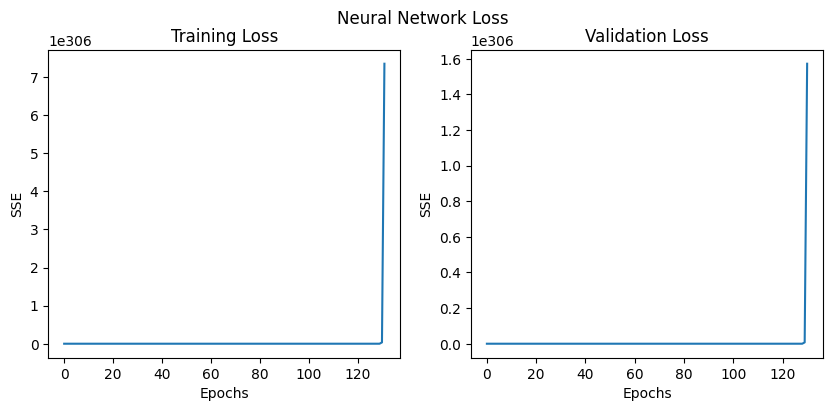

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle("Neural Network Loss")

axes[0].set_title("Training Loss")
axes[1].set_title("Validation Loss")

sns.lineplot({"Epochs": training_loss[0], "SSE": training_loss[1]}, x="Epochs", y="SSE", ax=axes[0])
sns.lineplot({"Epochs": training_loss[0], "SSE": training_loss[2]}, x="Epochs", y="SSE", ax=axes[1])
# The plots are in different scales since we use SSE, wich does not normalizes the error, and our training data is far bigger than the validation 

In [27]:
# Comparing parameters with the validation set

class_la0 = MultiLayer_Perceptron(2, 0)
class_la1 = MultiLayer_Perceptron(2, 0.1)
class_la2 = MultiLayer_Perceptron(2, 0.01)

layers_number = range(1, 4)
neurons_number = [100, 150, 250]

data2 = np.zeros((len(layers_number), len(neurons_number), 3))

for layers in layers_number:
    for idx in range(len(neurons_number)):
        loss0 = class_la0.fit(x2_train, t2_train, layers, neurons_number[idx], 1000, gradient_descent=1)[1][-1]
        data2[layers-1, idx, 0] = loss0 

        loss1 = class_la1.fit(x2_train, t2_train, layers, neurons_number[idx], 1000, gradient_descent=1)[1][-1]
        data2[layers-1, idx, 1] = loss1 
        
        loss2 = class_la2.fit(x2_train, t2_train, layers, neurons_number[idx], 1000, gradient_descent=1)[1][-1]
        data2[layers-1, idx, 2] = loss2

plot2_df0 = pd.DataFrame(data2[:, :, 0], layers_number, neurons_number)
plot2_df1 = pd.DataFrame(data2[:, :, 1], layers_number, neurons_number)
plot2_df2 = pd.DataFrame(data2[:, :, 2], layers_number, neurons_number)

# This cell takes a lot of time to run (around 40 minutes)

C:\Users\georg\AppData\Local\Temp\ipykernel_27140\95304115.py:144: RuntimeWarning: overflow encountered in matmul
  deltas = self.derivative_func(x @ w) * (self.weights[-2][1:,:] @ deltas_next.T).T
C:\Users\georg\AppData\Local\Temp\ipykernel_27140\95304115.py:144: RuntimeWarning: invalid value encountered in multiply
  deltas = self.derivative_func(x @ w) * (self.weights[-2][1:,:] @ deltas_next.T).T
C:\Users\georg\AppData\Local\Temp\ipykernel_27140\1447774528.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\georg\AppData\Local\Temp\ipykernel_27140\1447774528.py:36: RuntimeWarning: divide by zero encountered in divide
  return (target/predict) + (1 - target)/(1 - predict)
C:\Users\georg\AppData\Local\Temp\ipykernel_27140\1447774528.py:36: RuntimeWarning: invalid value encountered in divide
  return (target/predict) + (1 - target)/(1 - predict)
C:\Users\georg\AppData\Local\Temp\ipykernel_27140\1447774528.py:33: RuntimeWarning: divide by zero encoun

[Text(978.81045751634, 0.5, 'Number of Layers'),
 Text(0.5, 14.722222222222216, 'Number of Neurons')]

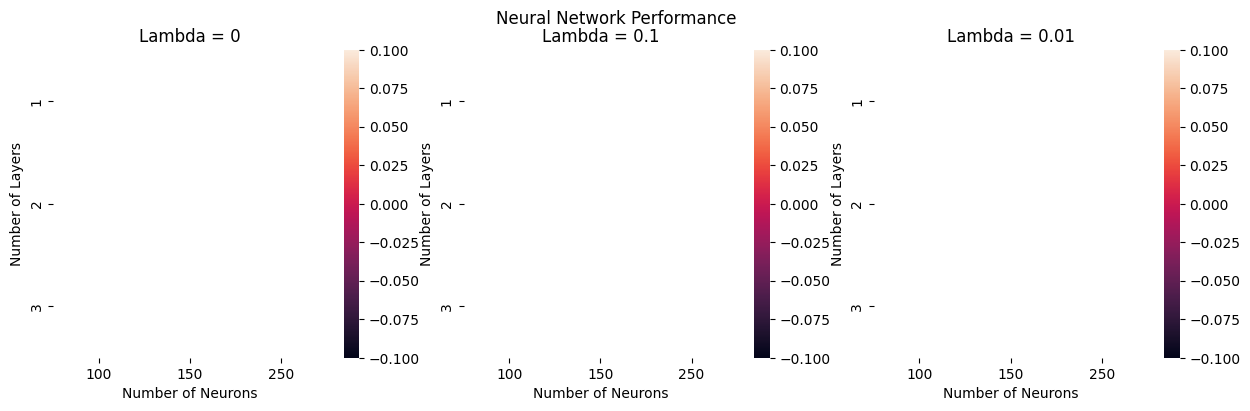

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle("Neural Network Performance")

sns.heatmap(plot2_df0, ax=axes[0])
sns.heatmap(plot2_df1, ax=axes[1])
sns.heatmap(plot2_df2, ax=axes[2])

axes[0].set_title("Lambda = 0")
axes[0].set(ylabel="Number of Layers", xlabel="Number of Neurons", )

axes[1].set_title("Lambda = 0.1")
axes[1].set(ylabel="Number of Layers", xlabel="Number of Neurons")

axes[2].set_title("Lambda = 0.01")
axes[2].set(ylabel="Number of Layers", xlabel="Number of Neurons")